## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 3
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with data.

----------------------------------------------------------

For this homework you will load the Star Wars data and practice making different kinds of plots!

This homework has **8 questions** from the lecture and **2 Problems**

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default='colab'

from itables import show

In [5]:
file_location = 'https://joannabieri.com/introdatascience/data/starwars.csv'
DF = pd.read_csv(file_location)

In [7]:
show(DF)

In [9]:
observation_name = 'Luke Skywalker'
# Select just the row where the name equals Like Skywalker
DF[DF['name']==observation_name]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"A New Hope, The Empire Strikes Back, Return of...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"


**Q1** How would you update the cell above to search for a different character? Make a change to the code above to find information about C-3PO.

In [13]:
# Your code here:
observation_name = 'C-3PO'
DF[DF['name']==observation_name]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,"A New Hope, The Empire Strikes Back, Return of...",NaN,NaN


**Q2** In the data for C-3PO one of the entries says NaN. What does this mean?

In [6]:
# Your code here:
# This implies there is no data.  For example, he has no hair, meaning there is no data to show for this.

**Q3** Look at some observations for other characters. Just choose a few different names and see what their data says.

In [17]:
# Your code here - or you can just rerun the code cell above.
observation_name = 'Luminara Unduli'
DF[DF['name']==observation_name]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
62,Luminara Unduli,170.0,56.2,black,yellow,blue,58.0,female,feminine,Mirial,Mirialan,"Attack of the Clones, Revenge of the Sith",NaN,NaN


In [19]:
observation_name = 'Jango Fett'
DF[DF['name']==observation_name]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
67,Jango Fett,183.0,79.0,black,tan,brown,66.0,male,masculine,Concord Dawn,Human,Attack of the Clones,NaN,NaN


In [26]:
observation_name = 'Grevious'

DF[DF['name']==observation_name]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships


**Q4** What happens if you spell a name wrong or forget to capitalize?

# if a name is spelled wrong or a capitalization is missed, the code cannot recognize the variable correctly and will return an error

**Q5** Check out each of the variables (columns):

1. What does each column tell you?
2. Is the data a word or a number or something else?
3. If the data is a number, what are the units?

-----------------------------------------

1. Each column tells a different piece of information about the character's appearance, background, or possessions.
2. The data is a word for all except height, mass, and birthyear in which it is a number
3. Although it does not specify, it can be assumed that height is given in cm, mass in kg, and birth year in years (rotations for Star Wars?).

### Exploratory Data Analysis (EDA)

1. Summary Statistics
2. Visualization (Today's Class)
3. Data Wrangling (Future Class)

#### Graph Mass vs. Height


In [31]:
fig = px.scatter(DF,
                 x='height',
                 y='mass',
                 title='Mass vs. Height of Starwars Characters')
fig.show()

**Q6** What do you notice about this graph? Are there any strange data points?

The main outlier in this data set would be Jabba with a much larger mass than any of the other characters

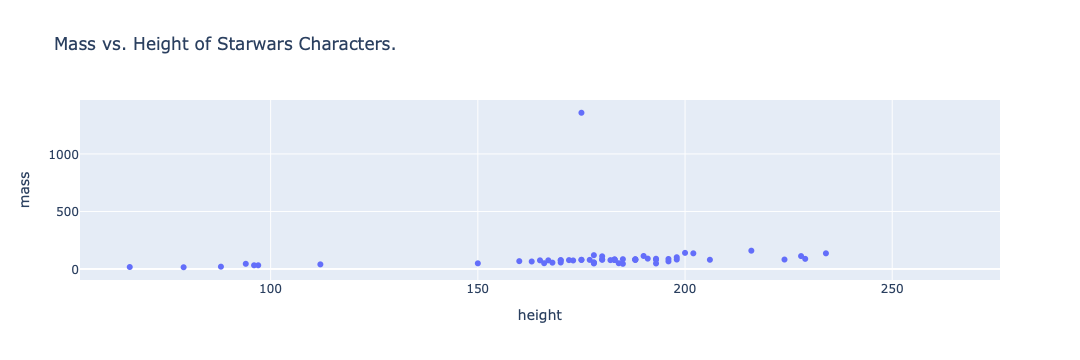

In [9]:
#Let's add some data so when we hover over the point we can see the characters name:
fig = px.scatter(DF,
                 x='height',
                 y='mass',
                 title='Mass vs. Height of Starwars Characters.',
                 hover_data='name')
fig.show()

#### You try birth_year vs mass

**Q7** See if you can figure out how to make a plot of the birth_year vs mass with the hover data being the name?

In [34]:
# Your code here:
fig = px.scatter(DF,
                 x='mass',
                 y='birth_year',
                 title='Birth year vs. Mass of Starwars Characters.',
                 hover_data='name')
fig.show()

---------------------------
--------------------------

## Why Visualize?!?!

Load the data for Anscombe's Quartet

In [36]:
# Load the data
#| label: Download data
#| warning: false

file_location = 'https://joannabieri.com/introdatascience/data/Anscombe_quartet_data.csv'
DF_new = pd.read_csv(file_location)

# Some code to make the data frame look nicer
DF_new = DF_new.drop(['x4'], axis=1)
DF_new.rename(columns={'x123':'x'}, inplace=True)

In [38]:
show(DF_new)

#### Summary Statistics

Pandas can do all sorts of statistics for us really quickly using the .describe() function!

In [40]:
DF_new.describe()

,x,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,8.570000,8.950000,7.980000,8.190000
max,14.000000,10.840000,9.260000,12.740000,12.500000


#### Visualization

Make a scatter plot for each of the y-values. Here is the first one:

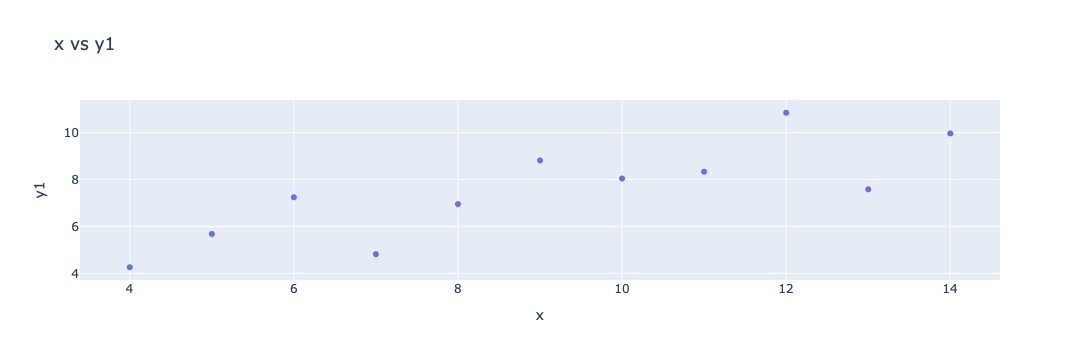

In [14]:
fig = px.scatter(DF_new,x='x',y='y1',title='x vs y1')
fig.show()

**Q8** Now you make the other three plots! What do you notice? Are they all the same?

In [42]:
# Your code here:
fig = px.scatter(DF_new,x='x',y='y2',title='x vs y2')
fig.show()

In [44]:
# Your code here:
fig = px.scatter(DF_new,x='x',y='y3',title='x vs y3')
fig.show()

In [46]:
# Your code here:
fig = px.scatter(DF_new,x='x',y='y4',title='x vs y4')
fig.show()

No, they are not all the same

### Problem 1

Let's try to make an even fancier graph of the Star Wars heigh vs mass data. 

Below you will find code that changes our Star Wars graph in the following ways:

1. It changes the marker size to 15
2. It changes the marker color to red
3. It changes the marker symbol to be a star
4. It makes the markers see through (opacity)
5. It puts a line around the marker with a width and color given.

Now your job is to make this plot your own. Change the colors, markers, etc.

Below you will see a list of all possible colors and markers that are automatically part of plotly.

In [54]:
fig = px.scatter(DF,
                 x='height',
                 y='mass',
                 title='Mass vs. Height of Starwars Characters.',
                 hover_data='name')
fig.update_traces(marker={'size': 15,
                          'color' : 'purple', 
                          'symbol' : 'square',
                          'opacity' : 0.75,
                          'line':{'width':2,'color':'DarkSlateGrey'}})
fig.show()

![Plotly Available Colors](images/colors.png)

![Plotly Available Symbols](images/symbols.png)

### Problem 2

Interacting with new types of plots! Over the course of the semester we will learn how to make all sorts of fancy plots. Below is code that makes a histogram of the different hair colors for the Star Wars characters. 

A. Figure out what the code does.

B. Change the code:
* New variable (x)
* New color
* New Title

In [58]:
fig = px.histogram(DF,
                   x='homeworld',
                   labels={'homeworld':'Homeworld'},
                   opacity=1,
                   color_discrete_sequence=['seagreen'])
fig.update_layout(bargap=0.1, title=
            'Histogram Homeworld in the Star Wars Universe',
            title_x=0.5)
fig.show()